
Merged Data:
        Date  Price Change %  Inflation_Rate  Interest_Rate
0 1982-01-01  120.4   -1.79%             0.3       7.623742
1 1983-01-01  145.3    3.34%             0.2       5.543389
2 1984-01-01  163.4   -0.91%             0.7       6.215304
3 1985-01-01  179.6    7.42%             0.2       6.161901
4 1986-01-01  211.8    0.24%             0.4       4.547185


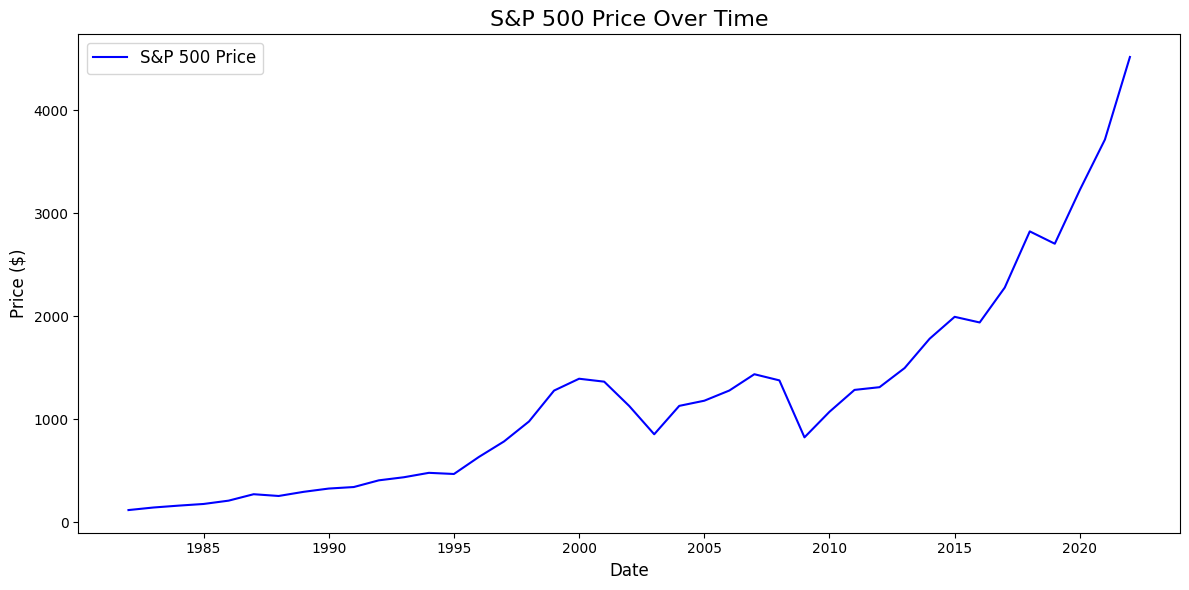

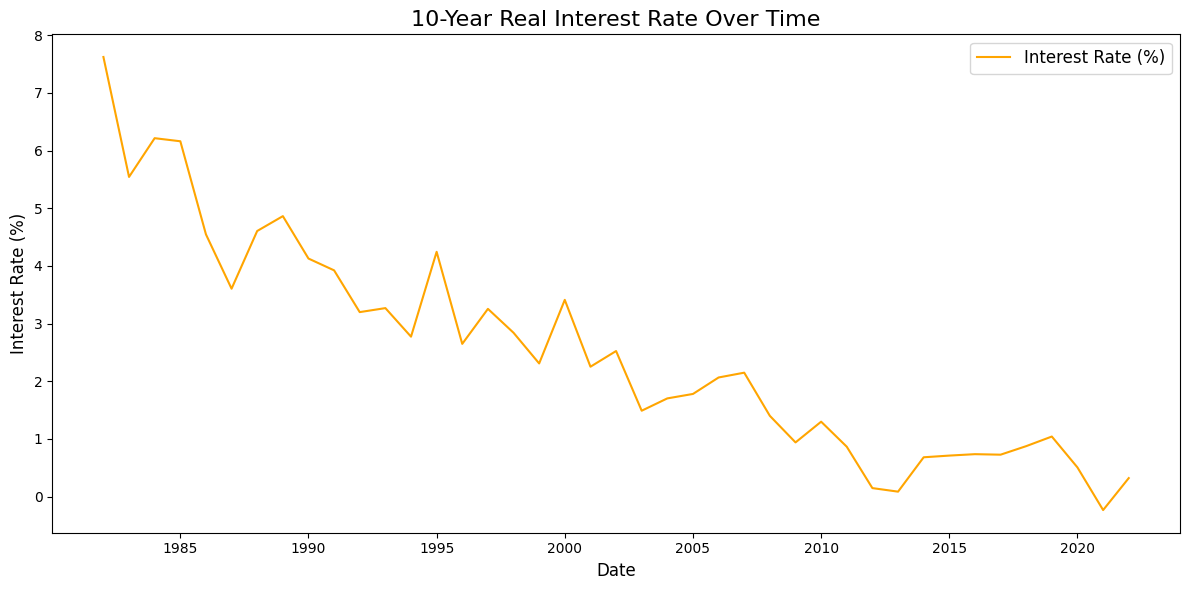

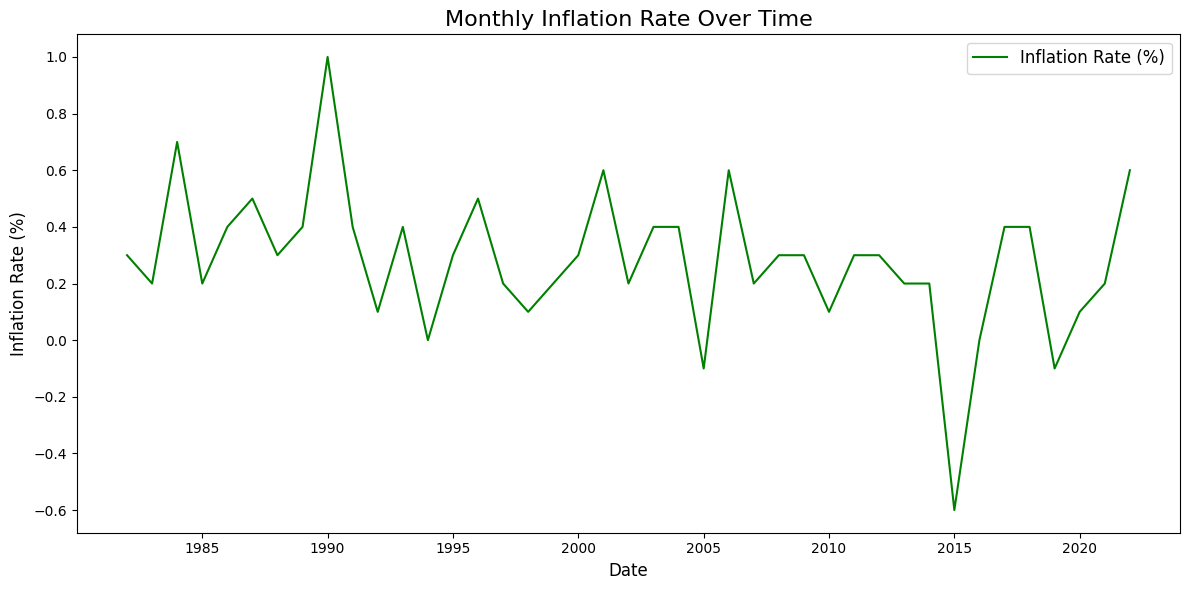

Pearson Correlation between Interest Rate and S&P 500 Price: -0.7487
95% Confidence Interval: [-0.8586, -0.5731]
P-value: <0.0001
Pearson Correlation between Inflation Rate and S&P 500 Price: -0.1882
95% Confidence Interval: [-0.4687, 0.1268]
P-value: 0.2386

Hypothesis 1:
Slope: -403.1246
95% Confidence Interval for Slope: [-518.7191, -287.5301]
Intercept: 2232.6691
95% Confidence Interval for Intercept: [1869.8860, 2595.4522]
R-squared: 0.5606
P-value: <0.0001
Reject the null hypothesis: There is a significant relationship between interest rates and stock prices.
As interest rates increase, stock prices tend to decrease.


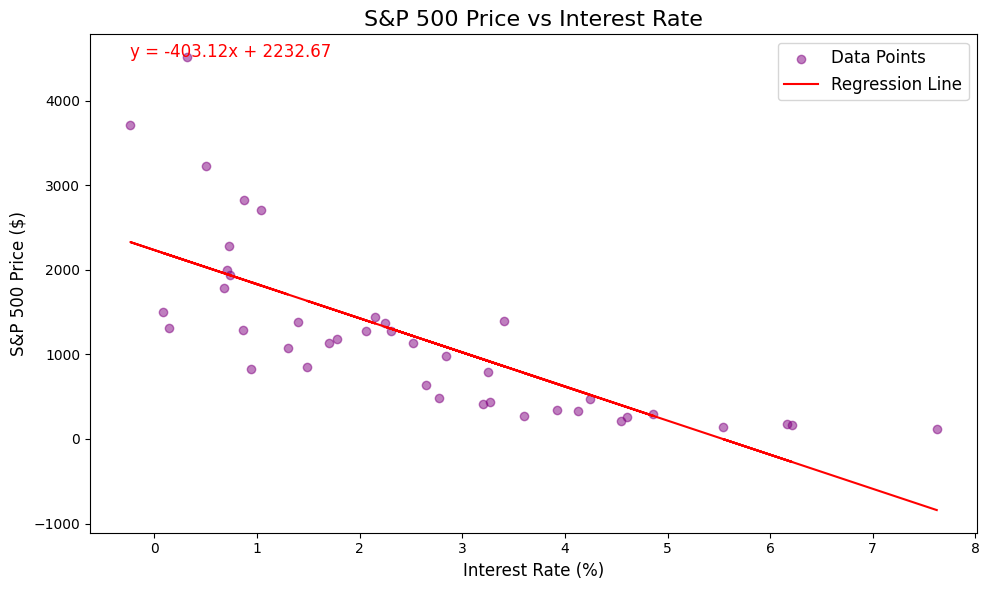


Hypothesis 2:
Maximum correlation of -0.8701 occurs at a lag of 5 months.
There is evidence of a lag between interest rate changes and stock price reactions.


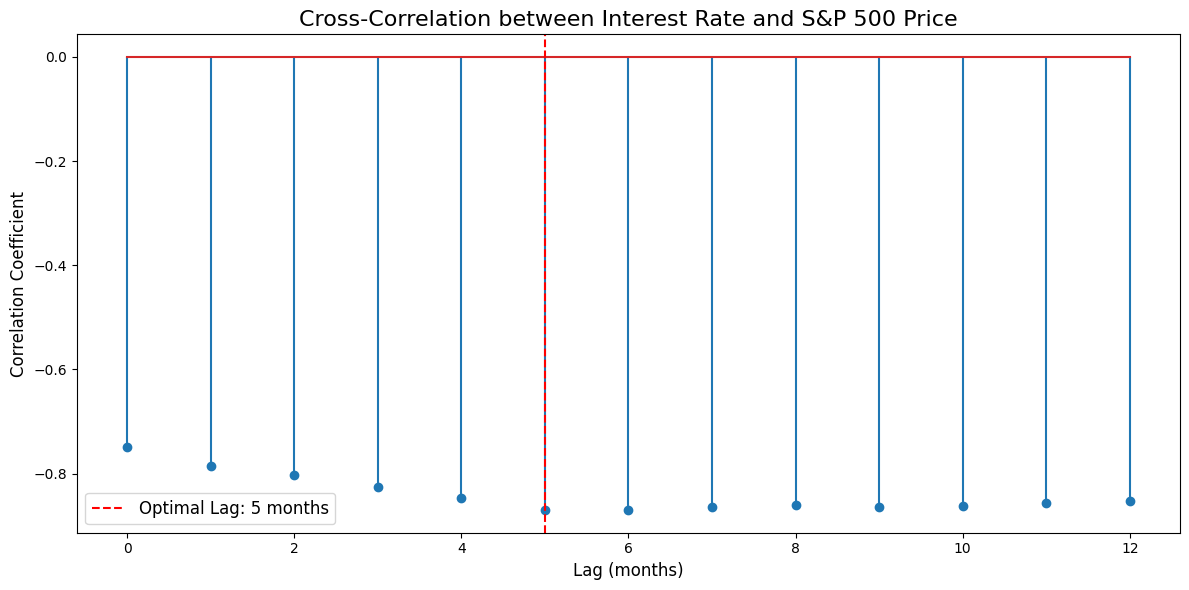


Hypothesis 3:
Correlation between Inflation Rate and S&P 500 Price: -0.1882 (P-value: 0.2386)
95% Confidence Interval: [-0.4687, 0.1268]
No significant association between inflation rates and stock prices.
Correlation between Interest Rate and S&P 500 Price: -0.7487 (P-value: <0.0001)
95% Confidence Interval: [-0.8586, -0.5731]
Significant negative association between interest rates and stock prices.


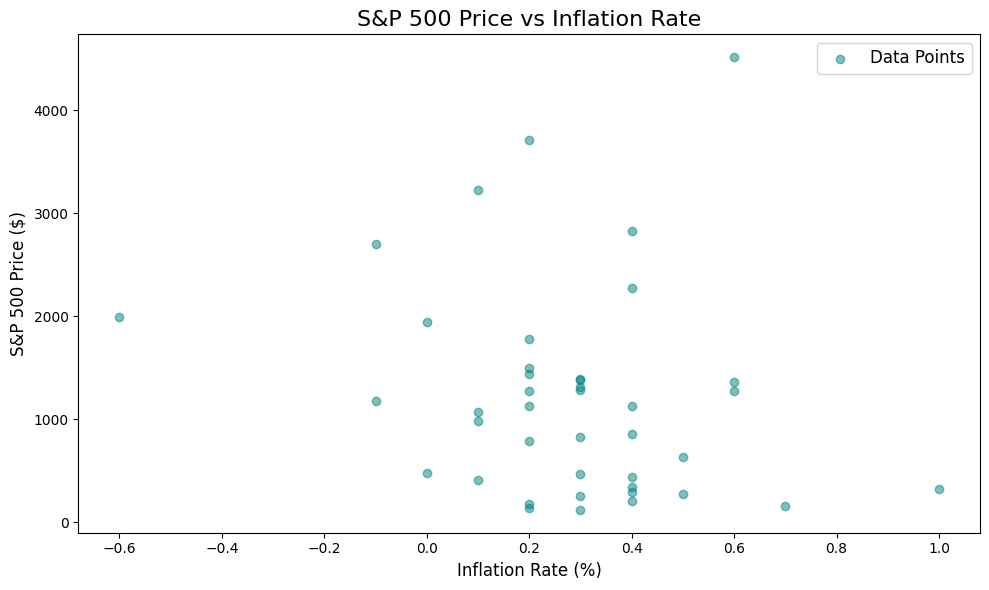


Conclusions:
1. There is a significant negative correlation between interest rates and stock prices (r = -0.7487, 95% CI = [-0.8586, -0.5731], p <0.0001), supporting Hypothesis 1.
2. The maximum correlation occurs at a lag of 5 months (r = -0.8701), suggesting that stock prices adjust to interest rate changes over this period, supporting Hypothesis 2.
3. Inflation rates are not associated with stock prices (r = -0.1882, 95% CI = [-0.4687, 0.1268], p = 0.2386), partially supporting Hypothesis 3.
   However, interest rates remain significantly and negatively associated with stock prices.


In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
from scipy import stats  # For statistical analysis
import numpy as np  # For numerical operations


# ---------------------------
# Data Loading and Cleaning
# ---------------------------

# Load S&P 500 data
sp500 = pd.read_csv('S&P_500_1982-2023.csv')
# Display first few rows of S&P 500 data
#print("S&P 500 Data:")
#print(sp500.head())

# Remove commas from 'Price' and convert to float
sp500['Price'] = sp500['Price'].str.replace(',', '').astype(float)

# Convert 'Date' to datetime format
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%d/%m/%Y')

# Load Inflation Rate data
inflation = pd.read_excel('US_Monthly_Inflation_Rate_1982-2023.xlsx')
# Display first few rows of Inflation data
#print("\nInflation Rate Data:")
#print(inflation.head())

# Melt the inflation data to have 'Date' and 'Inflation Rate'
inflation_melted = inflation.melt(id_vars=['Year'], var_name='Month', value_name='Inflation_Rate')

# Create a 'Date' column from 'Year' and 'Month'
# Map month abbreviations to month numbers for proper date parsing
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}
inflation_melted['Month_Num'] = inflation_melted['Month'].map(month_map)
inflation_melted['Date'] = pd.to_datetime(inflation_melted['Year'].astype(str) + '-' + inflation_melted['Month_Num'], format='%Y-%m')

# Drop unnecessary columns
inflation_melted = inflation_melted.drop(['Year', 'Month', 'Month_Num'], axis=1)

# Load Interest Rate data
interest = pd.read_csv('US_Monthly_Real_10Y_Interest_Rate_1982-2023.csv')
# Display first few rows of Interest Rate data
#print("\nInterest Rate Data:")
#print(interest.head())

# Convert 'DATE' to datetime format
interest['Date'] = pd.to_datetime(interest['DATE'], format='%Y/%m/%d')

# Rename interest rate column for clarity
interest = interest.rename(columns={'REAINTRATREARAT10Y': 'Interest_Rate'})

# Drop the original 'DATE' column
interest = interest.drop(['DATE'], axis=1)

# ---------------------------
# Merging Datasets
# ---------------------------

# Merge S&P 500 data with Inflation Rate data on 'Date'
merged_data = pd.merge(sp500, inflation_melted, on='Date', how='inner')

# Merge the above result with Interest Rate data on 'Date'
merged_data = pd.merge(merged_data, interest, on='Date', how='inner')

# Drop any remaining missing values
merged_data = merged_data.dropna()

# Display the first few rows of the merged dataset
print("\nMerged Data:")
print(merged_data.head())

# ---------------------------
# Exploratory Data Analysis
# ---------------------------

# Plot S&P 500 Price over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Price'], label='S&P 500 Price', color='blue')
plt.title('S&P 500 Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('sp500_price_over_time.png')  # Save the figure
plt.show()

# Plot Interest Rate over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Interest_Rate'], color='orange', label='Interest Rate (%)')
plt.title('10-Year Real Interest Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('interest_rate_over_time.png')  # Save the figure
plt.show()

# Plot Inflation Rate over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Inflation_Rate'], color='green', label='Inflation Rate (%)')
plt.title('Monthly Inflation Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('inflation_rate_over_time.png')  # Save the figure
plt.show()

# ---------------------------
# Statistical Analysis
# ---------------------------

# Function to calculate confidence intervals for Pearson r using Fisher's Z-transformation
def pearson_confidence_interval(r, n, confidence=0.95):
    """
    Calculate the confidence interval for Pearson's correlation coefficient.
    
    Parameters:
    r (float): Pearson correlation coefficient
    n (int): Sample size
    confidence (float): Confidence level
    
    Returns:
    tuple: Lower and upper bounds of the confidence interval
    """
    # Fisher's Z transformation
    z = 0.5 * np.log((1 + r) / (1 - r))
    se = 1 / np.sqrt(n - 3)
    # Z critical value
    z_critical = stats.norm.ppf(1 - (1 - confidence) / 2)
    # Confidence interval in Z
    z_lower = z - z_critical * se
    z_upper = z + z_critical * se
    # Convert back to r
    r_lower = (np.exp(2*z_lower) - 1) / (np.exp(2*z_lower) + 1)
    r_upper = (np.exp(2*z_upper) - 1) / (np.exp(2*z_upper) + 1)
    return r_lower, r_upper

# Calculate Pearson correlation between Interest Rate and S&P 500 Price
corr_interest_price, p_value_interest = stats.pearsonr(merged_data['Interest_Rate'], merged_data['Price'])
n = merged_data.shape[0]
ci_interest = pearson_confidence_interval(corr_interest_price, n)
# Adjust p-value display
if p_value_interest < 0.0001:
    p_value_interest_display = "<0.0001"
else:
    p_value_interest_display = f"{p_value_interest:.4f}"
print(f"Pearson Correlation between Interest Rate and S&P 500 Price: {corr_interest_price:.4f}")
print(f"95% Confidence Interval: [{ci_interest[0]:.4f}, {ci_interest[1]:.4f}]")
print(f"P-value: {p_value_interest_display}")

# Calculate Pearson correlation between Inflation Rate and S&P 500 Price
corr_inflation_price, p_value_inflation = stats.pearsonr(merged_data['Inflation_Rate'], merged_data['Price'])
ci_inflation = pearson_confidence_interval(corr_inflation_price, n)
# Adjust p-value display
if p_value_inflation < 0.0001:
    p_value_inflation_display = "<0.0001"
else:
    p_value_inflation_display = f"{p_value_inflation:.4f}"
print(f"Pearson Correlation between Inflation Rate and S&P 500 Price: {corr_inflation_price:.4f}")
print(f"95% Confidence Interval: [{ci_inflation[0]:.4f}, {ci_inflation[1]:.4f}]")
print(f"P-value: {p_value_inflation_display}")

# ---------------------------
# Hypothesis Testing
# ---------------------------

# Hypothesis 1: Increase in interest rates negatively affects stock prices in the short term

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Interest_Rate'], merged_data['Price'])
r_squared = r_value ** 2  # Calculate R-squared

# Calculate confidence intervals for slope and intercept
# Degrees of freedom
df = n - 2
# t critical value
t_critical = stats.t.ppf(1 - 0.025, df)
# Confidence intervals
slope_ci = (slope - t_critical * std_err, slope + t_critical * std_err)
intercept_ci = (intercept - t_critical * std_err * np.sqrt(np.mean(merged_data['Interest_Rate']**2)),
               intercept + t_critical * std_err * np.sqrt(np.mean(merged_data['Interest_Rate']**2)))

# Adjust p-value display
if p_value < 0.0001:
    p_value_display = "<0.0001"
else:
    p_value_display = f"{p_value:.4f}"

print("\nHypothesis 1:")
print(f"Slope: {slope:.4f}")
print(f"95% Confidence Interval for Slope: [{slope_ci[0]:.4f}, {slope_ci[1]:.4f}]")
print(f"Intercept: {intercept:.4f}")
print(f"95% Confidence Interval for Intercept: [{intercept_ci[0]:.4f}, {intercept_ci[1]:.4f}]")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value_display}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between interest rates and stock prices.")
    if slope < 0:
        print("As interest rates increase, stock prices tend to decrease.")
    else:
        print("As interest rates increase, stock prices tend to increase.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")

# Scatter plot for Hypothesis 1 with regression line
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Interest_Rate'], merged_data['Price'], color='purple', alpha=0.5, label='Data Points')
# Calculate regression line
regression_line = slope * merged_data['Interest_Rate'] + intercept
plt.plot(merged_data['Interest_Rate'], regression_line, color='red', label='Regression Line')
plt.title('S&P 500 Price vs Interest Rate', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('S&P 500 Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.text(merged_data['Interest_Rate'].min(), merged_data['Price'].max(),
         f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red')
plt.tight_layout()
plt.savefig('sp500_vs_interest_rate.png')  # Save the figure
plt.show()

# Hypothesis 2: There is a lag between interest rate changes and stock price reactions

# Adjust lag range to include only non-negative lags (0 to +12 months)
max_lag = 12  # Maximum lag of 12 months
lags = range(0, max_lag + 1)  # Lags from 0 to +12
correlations = []

for lag in lags:
    if lag == 0:
        # No shift
        corr = merged_data['Interest_Rate'].corr(merged_data['Price'])
    else:
        # Shift Price backward to see how past Interest Rates affect current Price
        shifted_price = merged_data['Price'].shift(lag)
        corr = merged_data['Interest_Rate'].corr(shifted_price)
    correlations.append(corr)

# Find the lag with the highest absolute correlation
max_corr = max(correlations, key=lambda x: abs(x) if pd.notnull(x) else -np.inf)
optimal_lag = lags[correlations.index(max_corr)]

print("\nHypothesis 2:")
print(f"Maximum correlation of {max_corr:.4f} occurs at a lag of {optimal_lag} months.")
if abs(max_corr) > abs(corr_interest_price):
    print("There is evidence of a lag between interest rate changes and stock price reactions.")
else:
    print("No significant lag detected between interest rate changes and stock price reactions.")

# Plot cross-correlation
plt.figure(figsize=(12,6))
plt.stem(lags, correlations) 
plt.title('Cross-Correlation between Interest Rate and S&P 500 Price', fontsize=16)
plt.xlabel('Lag (months)', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=optimal_lag, color='red', linestyle='--', label=f'Optimal Lag: {optimal_lag} months')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('cross_correlation.png')  # Save the figure
plt.show()

# Hypothesis 3: Effect of both inflation rate and interest rate on stock prices

print("\nHypothesis 3:")

# Calculate Pearson correlation between Inflation Rate and S&P 500 Price
print(f"Correlation between Inflation Rate and S&P 500 Price: {corr_inflation_price:.4f} (P-value: {p_value_inflation_display})")
print(f"95% Confidence Interval: [{ci_inflation[0]:.4f}, {ci_inflation[1]:.4f}]")
if p_value_inflation < 0.05:
    if corr_inflation_price < 0:
        print("Significant negative association between inflation rates and stock prices.")
    else:
        print("Significant positive association between inflation rates and stock prices.")
else:
    print("No significant association between inflation rates and stock prices.")

# Correlation between Interest Rate and S&P 500 Price already calculated
print(f"Correlation between Interest Rate and S&P 500 Price: {corr_interest_price:.4f} (P-value: {p_value_interest_display})")
print(f"95% Confidence Interval: [{ci_interest[0]:.4f}, {ci_interest[1]:.4f}]")
if p_value_interest < 0.05:
    if corr_interest_price > 0:
        print("Significant positive association between interest rates and stock prices.")
    else:
        print("Significant negative association between interest rates and stock prices.")
else:
    print("No significant association between interest rates and stock prices.")

# Scatter plot for Inflation Rate vs S&P 500 Price
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Inflation_Rate'], merged_data['Price'], color='teal', alpha=0.5, label='Data Points')
plt.title('S&P 500 Price vs Inflation Rate', fontsize=16)
plt.xlabel('Inflation Rate (%)', fontsize=12)
plt.ylabel('S&P 500 Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('sp500_vs_inflation_rate.png')  # Save the figure
plt.show()

# ---------------------------
# Conclusions
# ---------------------------

print("\nConclusions:")
print(f"1. There is a significant negative correlation between interest rates and stock prices (r = {corr_interest_price:.4f}, 95% CI = [{ci_interest[0]:.4f}, {ci_interest[1]:.4f}], p {p_value_interest_display}), supporting Hypothesis 1.")
print(f"2. The maximum correlation occurs at a lag of {optimal_lag} months (r = {max_corr:.4f}), suggesting that stock prices adjust to interest rate changes over this period, supporting Hypothesis 2.")
print(f"3. Inflation rates are {'significantly ' if p_value_inflation < 0.05 else 'not '}associated with stock prices (r = {corr_inflation_price:.4f}, 95% CI = [{ci_inflation[0]:.4f}, {ci_inflation[1]:.4f}], p = {p_value_inflation_display}), partially supporting Hypothesis 3.")
print("   However, interest rates remain significantly and negatively associated with stock prices.")
